# Фаза 2 • Неделя 9 • Компьютерное зрение

## Детекция объектов с помощью YOLO

In [ ]:
# # Если нужен GoogleDrive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Устанавливаем зависимости

In [ ]:
!pwd

/content/yolov5


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-372-ga3555241 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/112.6 GB disk)


In [ ]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.io import read_image

### 1. Простой инференс

Запускаем детекцию с помощью `detect.py` на изображениях, видео или прочих источниках. Результаты сохранятся в `runs`.
Пример:
 ```shell
python detect.py --source 0  # веб-камера
                          img.jpg  # картинка
                          vid.mp4  # видео
                          screen  # скриншот
                         'path/*.jpg'  # директория с картинками
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP потоковое видео
```

In [ ]:
# При установке меняется домашняя директория.
# Была /content/ стала /content/yolov5
!pwd

/content/yolov5


In [ ]:
# создадим папку и загрузим туда пару изображений
!mkdir imgs
!wget -O imgs/image1.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/2880px-Cat_August_2010-4.jpg
!wget -O imgs/image2.jpg https://www.rover.com/blog/wp-content/uploads/2015/08/16063551569_06f5607585_o-960x540.jpg

--2024-10-15 07:50:21--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/2880px-Cat_August_2010-4.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922105 (900K) [image/jpeg]
Saving to: ‘imgs/image1.jpg’

imgs/image1.jpg     100%[===================>] 900.49K  --.-KB/s    in 0.03s   

2024-10-15 07:50:21 (25.2 MB/s) - ‘imgs/image1.jpg’ saved [922105/922105]

--2024-10-15 07:50:21--  https://www.rover.com/blog/wp-content/uploads/2015/08/16063551569_06f5607585_o-960x540.jpg
Resolving www.rover.com (www.rover.com)... 104.17.219.168, 104.17.218.168, 104.17.221.168, ...
Connecting to www.rover.com (www.rover.com)|104.17.219.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104345 (102K) [image/jpeg]
Saving to: ‘imgs/image2.jpg’

imgs/image

In [ ]:
!python /content/yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.5 --source /content/yolov5/imgs/

detect: weights=['yolov5s.pt'], source=/content/yolov5/imgs/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-372-ga3555241 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 274MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/yolov5/imgs/image1.jpg: 416x640 1 cat, 31.8ms
image 2/2 /content/yolov5/imgs/image2.jpg: 384x640 1 cat, 47.6ms
Speed: 0.5ms pre-process, 39.7ms inference, 349.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/dete

In [ ]:
# !pwd

In [ ]:
# home directory = yolov5
path = 'runs/detect/exp'

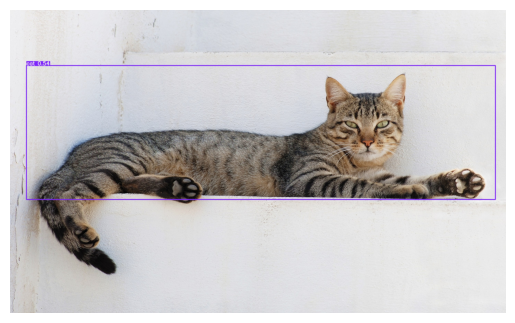

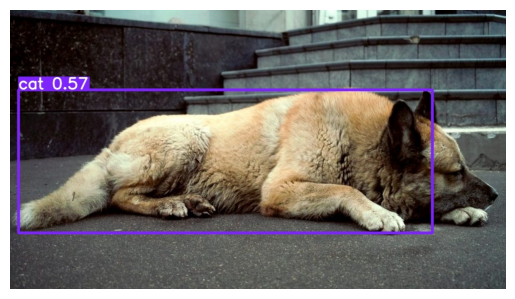

In [ ]:
for i in os.listdir(path):
    plt.imshow((read_image(os.path.join(path, i)).permute(1, 2, 0)))
    plt.axis('off')
    plt.show()

### 2. Обучение на своих данных.

 1. Размечаем датасет на roboflow и скачиваем его к себе.
 2. Запускаем обучение!

In [ ]:
# https://universe.roboflow.com/cv-project-ggmi2/dog-breeds-ggciv/dataset/5/download
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OpgqfxzHLNPUBuepRQpy")
project = rf.workspace("workspace-zy1aq").project("golden-6je4m")
version = project.version(2)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to golden-2 in yolov5pytorch:: 100%|██████████| 86/86 [00:00<00:00, 5339.35it/s]


In [ ]:
# Train!
!python /content/yolov5/train.py --batch 16 --epochs 2 --data /content/yolov5/golden-2/data.yaml --weights yolov5n.pt

2024-10-15 08:05:25.341631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 08:05:25.361563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 08:05:25.367510: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5n.pt, cfg=, data=/content/yolov5/golden-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False,

1. По умолчанию результаты будут сохраняться в папку `yolov5/runs`, если нужно сохранять по другому пути, можно в ключи добавить путь к папку, куда хотим сохранять. Например, если подключен GoogleDrive:

    ```
    --name /content/drive/MyDrive/yolo_demo
    ```

    Тогда результаты будут сохраняться на GoogleDrive в папку `yolo_demo`. Создавать предварительно эту папку не нужно: скрипт сам создаст её.

2. Имея собственные веса можно **продолжить** обучение модели: нужно изменить аргумент `weights`:

    ```
    --weights /path/to/your/weights.pt
    ```

### Инференс собственной модели

In [ ]:
!pwd

/content/yolov5


In [ ]:
model = torch.hub.load(
    # будем работать с локальной моделью в текущей папке
    repo_or_dir = '.',
    # непредобученная – будем подставлять свои веса
    model = 'custom',
    # путь к нашим весам
    path='/content/yolov5/runs/train/exp/weights/best.pt',
    # откуда берем модель – наша локальная
    source='local'
    )

YOLOv5 🚀 v7.0-372-ga3555241 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


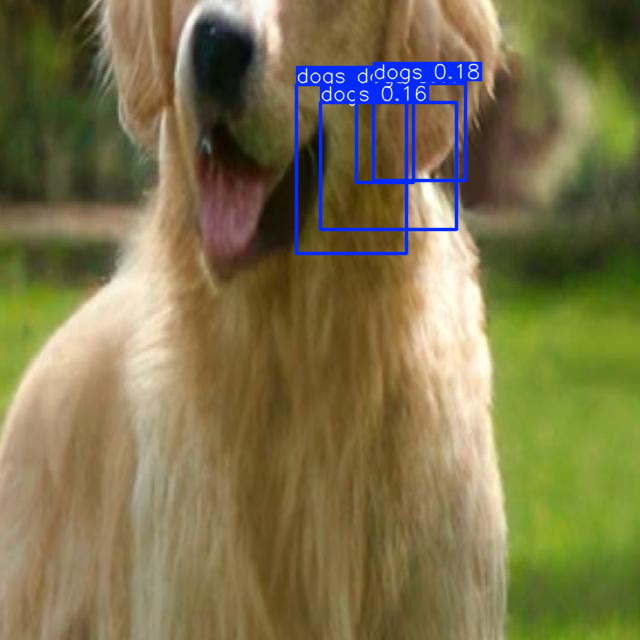

In [ ]:
import torchvision.transforms as T
# Начиная с какой вероятности отрисовывать детекции
model.conf = 0.9
# Читаем картинку
img = T.ToPILImage()(read_image('/content/yolov5/golden-2/test/images/SCR-20240402-nkut_jpeg.rf.caa3f1258daccf7195b63dbb4cdce864.jpg'))
model.eval()
with torch.inference_mode():
    results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), render(), etc
results.show()